In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set() 

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [61]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
#查看列信息
df.info()
#lead_time 从预约到入住的天数
#stays_in_week_nights，周内留宿，weekend周末留宿

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

## 分析酒店回头客特征

两中酒店回头客构成情况

查询出度假酒店中旅客为回头客的数据

In [6]:
#所有酒店来店2次以上的顾客数据
repeated=df.query('is_repeated_guest==1')

In [7]:
repeated.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13937,Resort Hotel,0,6,2016,April,17,20,0,2,1,...,No Deposit,5.0,NaN,0,Transient,0.00,1,0,Check-Out,2016-04-22
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,...,No Deposit,156.0,NaN,0,Contract,90.95,0,0,Canceled,2015-01-01
14777,Resort Hotel,1,187,2015,August,32,4,0,5,2,...,No Deposit,240.0,NaN,0,Transient,66.00,0,2,Canceled,2015-01-29
14817,Resort Hotel,1,202,2015,September,36,1,2,8,2,...,No Deposit,156.0,NaN,0,Contract,55.68,0,1,Canceled,2015-02-11
14823,Resort Hotel,1,173,2015,August,34,16,2,5,2,...,No Deposit,250.0,NaN,0,Transient,130.90,0,0,Canceled,2015-02-24


In [8]:
repeated.groupby('hotel').mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,0.217028,35.900591,2016.050689,27.405512,15.141732,0.355807,1.337106,1.325295,0.025098,0.003937,1.0,0.767224,4.852854,0.241142,34.668061,90.417766,0.168307,64.234793,0.113189,0.633858
Resort Hotel,0.062430,24.941507,2016.363892,22.052306,15.911699,0.552868,1.639483,1.462317,0.039370,0.002250,1.0,0.129921,2.136108,0.291339,196.060440,223.365854,0.164229,64.687373,0.227784,0.622047


对比两种酒店的平均数可以看出：

    度假酒店的订单的取消率更高

    城市酒店成功入住次数更多

    两种酒店的平均每日房价相差不大

In [9]:
rh_repeated=repeated.groupby('hotel')

In [10]:
rh_repeated.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13937,Resort Hotel,0,6,2016,April,17,20,0,2,1,...,No Deposit,5.0,NaN,0,Transient,0.00,1,0,Check-Out,2016-04-22
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,...,No Deposit,156.0,NaN,0,Contract,90.95,0,0,Canceled,2015-01-01
14777,Resort Hotel,1,187,2015,August,32,4,0,5,2,...,No Deposit,240.0,NaN,0,Transient,66.00,0,2,Canceled,2015-01-29
14817,Resort Hotel,1,202,2015,September,36,1,2,8,2,...,No Deposit,156.0,NaN,0,Contract,55.68,0,1,Canceled,2015-02-11
14823,Resort Hotel,1,173,2015,August,34,16,2,5,2,...,No Deposit,250.0,NaN,0,Transient,130.90,0,0,Canceled,2015-02-24
73714,City Hotel,1,265,2015,July,28,9,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,2014-10-17
73715,City Hotel,1,258,2015,July,27,2,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,2014-10-17
73716,City Hotel,1,258,2015,July,27,2,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,2014-10-17
73717,City Hotel,1,258,2015,July,27,2,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,2014-10-17
73718,City Hotel,1,258,2015,July,27,2,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,2014-10-17


In [161]:
#度假酒店的回头客数据
resort=rh_repeated.get_group('Resort Hotel').count()

In [12]:
#城市酒店的回头客数据
city=rh_repeated.get_group('City Hotel').count()

In [13]:
city

hotel                             2032
is_canceled                       2032
lead_time                         2032
arrival_date_year                 2032
arrival_date_month                2032
arrival_date_week_number          2032
arrival_date_day_of_month         2032
stays_in_weekend_nights           2032
stays_in_week_nights              2032
adults                            2032
children                          2032
babies                            2032
meal                              2032
country                           2032
market_segment                    2032
distribution_channel              2032
is_repeated_guest                 2032
previous_cancellations            2032
previous_bookings_not_canceled    2032
reserved_room_type                2032
assigned_room_type                2032
booking_changes                   2032
deposit_type                      2032
agent                              717
company                           1137
days_in_waiting_list     

In [162]:
resort

hotel                             1778
is_canceled                       1778
lead_time                         1778
arrival_date_year                 1778
arrival_date_month                1778
arrival_date_week_number          1778
arrival_date_day_of_month         1778
stays_in_weekend_nights           1778
stays_in_week_nights              1778
adults                            1778
children                          1778
babies                            1778
meal                              1778
country                           1774
market_segment                    1778
distribution_channel              1778
is_repeated_guest                 1778
previous_cancellations            1778
previous_bookings_not_canceled    1778
reserved_room_type                1778
assigned_room_type                1778
booking_changes                   1778
deposit_type                      1778
agent                              728
company                            533
days_in_waiting_list     

In [16]:
x=['city hotel','resort hotel']

In [25]:
height=[2031,1778]

Text(0.5, 1.0, 'repeated guest comp')

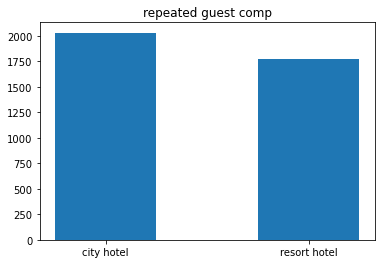

In [26]:
plt.bar(x,height,width = 0.5)
plt.title('repeated guest comp')

城市酒店的回头客略多于度假酒店

## city hotel的回头客都来自哪里

#### 数据整理

In [110]:
#在数据中共出现多少个的国家(其中一个是nan)
len(c_resort['country'].unique())

29

In [111]:
c_resort['country'].unique()

array(['PRT', 'ESP', nan, 'GBR', 'IRL', 'ITA', 'USA', 'FRA', 'DEU', 'NLD',
       'NOR', 'AUT', 'AUS', 'RUS', 'JPN', 'CHN', 'BEL', 'POL', 'FIN',
       'PRI', 'CN', 'LBN', 'LUX', 'BRA', 'SWE', 'ISL', 'AGO', 'CHE',
       'MAR'], dtype=object)

In [91]:
c_resort=rh_repeated.get_group('Resort Hotel')
c_city=rh_repeated.get_group('City Hotel')

In [95]:
x1=c_resort['country']
x2=c_city['country']

In [152]:
#将国家顺序的字符串传入city_sort
city_sort=x2.value_counts().index

In [153]:
city_sort

Index(['PRT', 'FRA', 'ESP', 'DEU', 'ITA', 'GBR', 'AGO', 'USA', 'BEL', 'TUR',
       'BRA', 'AUT', 'SWE', 'NLD', 'GRC', 'POL', 'ISR', 'LUX', 'IRL', 'JPN',
       'CHN', 'DZA', 'SVN', 'DNK', 'TUN', 'NGA', 'ARG', 'ARE', 'MOZ', 'CHE',
       'ZAF', 'MAR', 'RUS', 'AUS', 'PER', 'KOR', 'NOR'],
      dtype='object')

In [167]:
##将国家顺序的字符串传入resort_sort
resort_sort=x1.value_counts().index

In [168]:
resort_sort

Index(['PRT', 'GBR', 'ESP', 'IRL', 'ITA', 'FRA', 'NLD', 'USA', 'BRA', 'BEL',
       'PRI', 'CHN', 'DEU', 'CN', 'AUT', 'SWE', 'AGO', 'RUS', 'POL', 'FIN',
       'CHE', 'JPN', 'AUS', 'NOR', 'LBN', 'LUX', 'ISL', 'MAR'],
      dtype='object')

#### 可视化

In [164]:
resort=rh_repeated.get_group('Resort Hotel')

In [165]:
city=rh_repeated.get_group('City Hotel')

<AxesSubplot:xlabel='count', ylabel='country'>

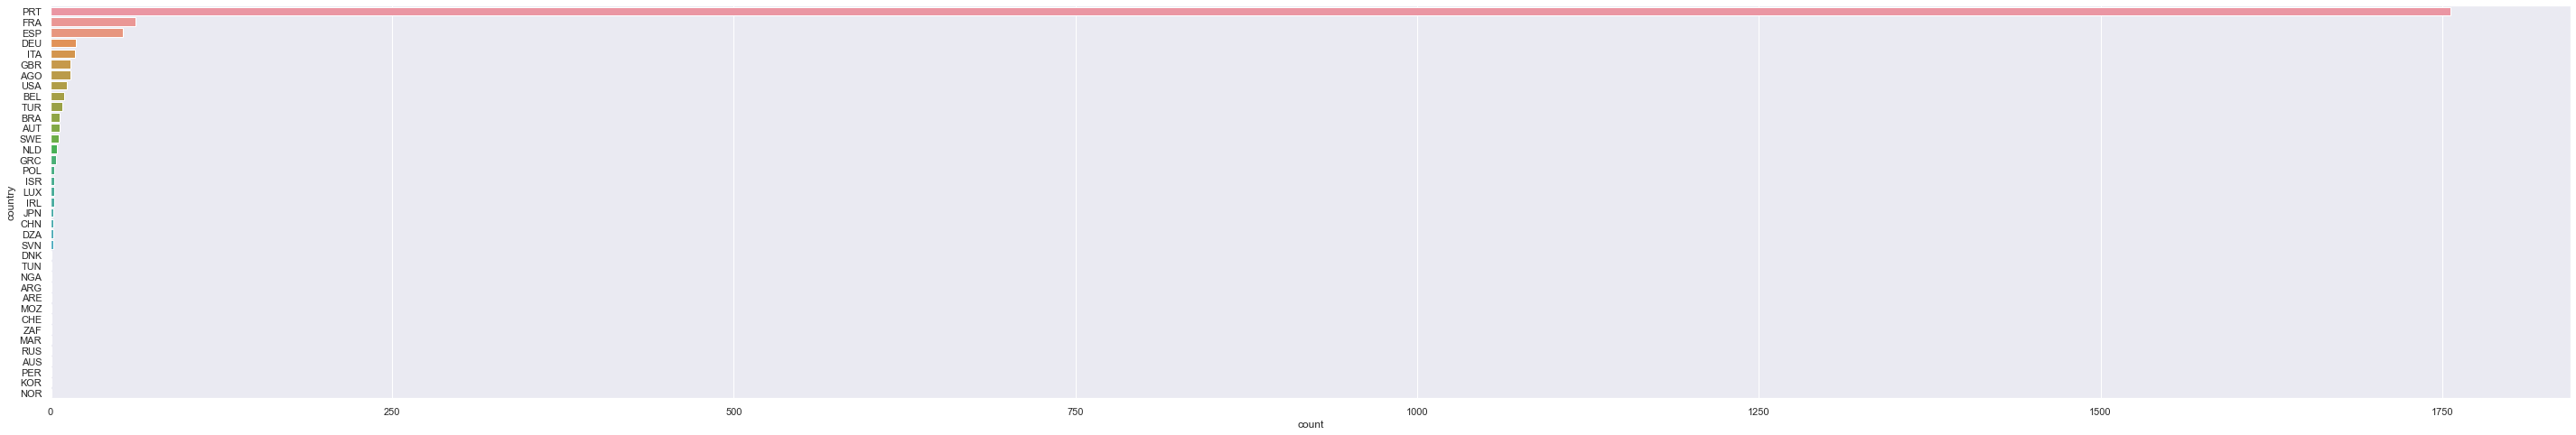

In [166]:
#城市酒店回头客所属地可视化
sns.countplot(y='country',data=city,order=city_sort)

In [176]:
#城市酒店出现频率前五的国家
x2.value_counts()[:5]

PRT    1756
FRA      62
ESP      53
DEU      19
ITA      18
Name: country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='country'>

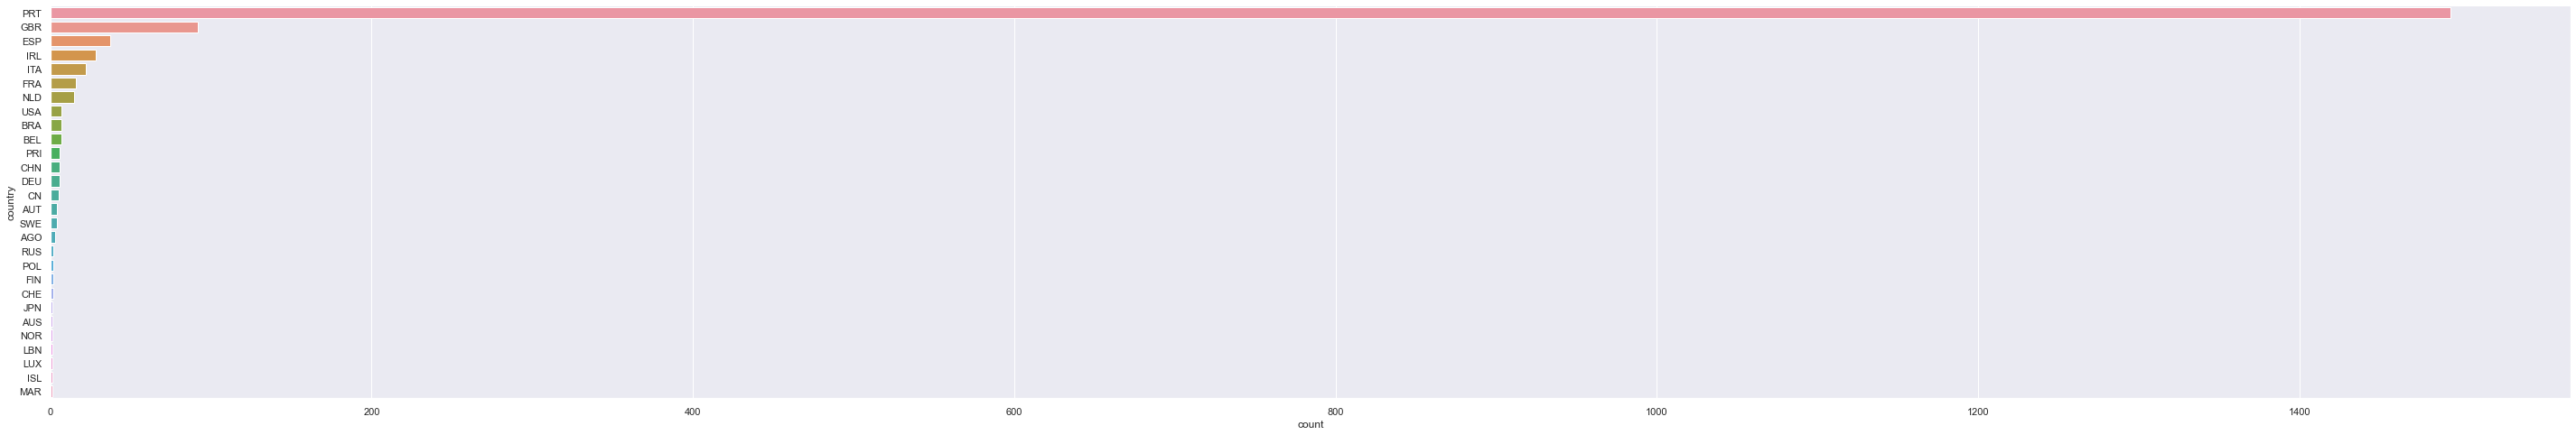

In [169]:
#度假酒店回头客所属地可视化
sns.countplot(y='country',data=resort,order=resort_sort)

In [175]:
#度假酒店出现频率前五的国家
x1.value_counts()[:5]

PRT    1494
GBR      92
ESP      37
IRL      28
ITA      22
Name: country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='country'>

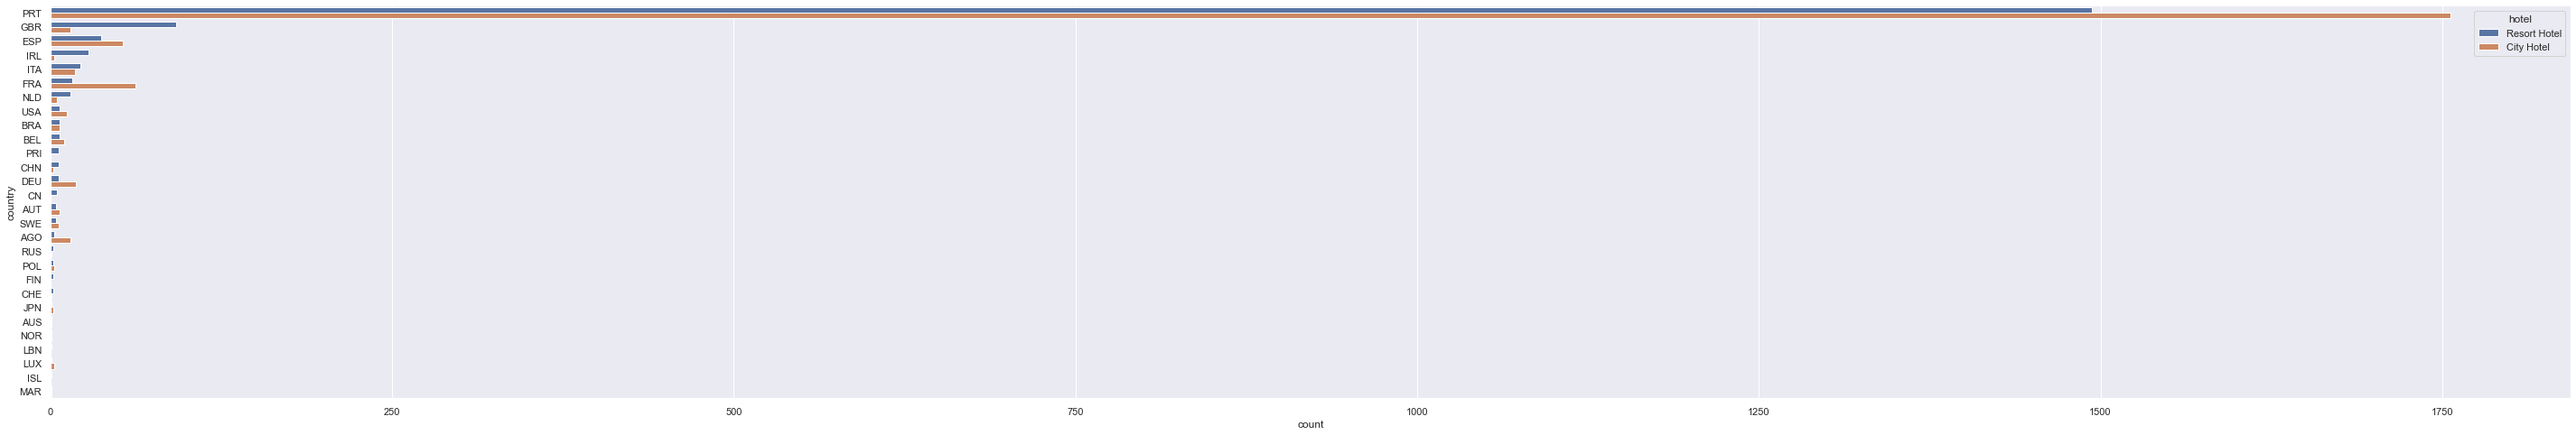

In [174]:
#蓝色为度假酒店，橘黄色为城市酒店
#以度假酒店为基准对比了两种酒店回头客的国家差异
sns.countplot(y='country',data=repeated,hue='hotel',order=resort_sort)

我们可以看出来，由于两家酒店都在葡萄牙本土，所以无论是哪个酒店，回头客大部分来自葡萄牙，当然第一次光顾的客人大部分也为葡萄牙本土游客。而其他顾客也都来自于葡萄牙周边的地区。

度假酒店的德国顾客更多，城市酒店的法国顾客更多

In [271]:
#取出前5,并将其他占比较少的国家设置为其他
#度假酒店resort
resort_other_sum=x1.value_counts()[5::].sum()
resort_other_sum

101

In [257]:
resort_pie=pd.DataFrame()
resort_pie=(x1.value_counts()[:5])
resort_pie

PRT    1494
GBR      92
ESP      37
IRL      28
ITA      22
Name: country, dtype: int64

In [272]:
resort_pie['others']=101
resort_pie

PRT       1494
GBR         92
ESP         37
IRL         28
ITA         22
others     101
Name: country, dtype: int64

Text(0.5, 1.0, 'pie of resort hotel about country')

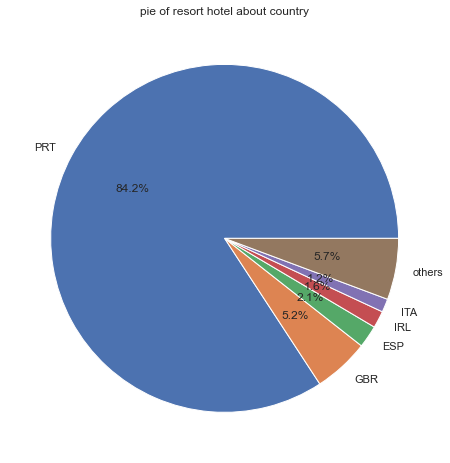

In [283]:
plt.pie(resort_pie,
       labels=['PRT','GBR','ESP','IRL','ITA','others'],
         autopct='%.1f%%')
plt.title('pie of resort hotel about country')

In [278]:
#取出前5,并将其他占比较少的国家设置为其他
#城市酒店city
city_other_sum=x2.value_counts()[5::].sum()
city_other_sum

124

In [279]:
city_pie=pd.DataFrame()
city_pie=(x2.value_counts()[:5])
city_pie

PRT    1756
FRA      62
ESP      53
DEU      19
ITA      18
Name: country, dtype: int64

In [280]:
city_pie['others']=124
city_pie

PRT       1756
FRA         62
ESP         53
DEU         19
ITA         18
others     124
Name: country, dtype: int64

Text(0.5, 1.0, 'pie of city hotel about country')

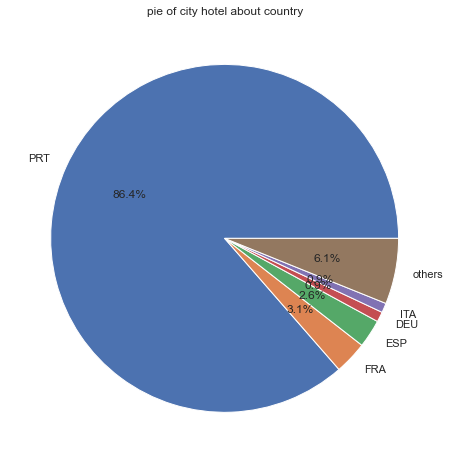

In [282]:
plt.pie(city_pie,
       labels=['PRT','FRA','ESP','DEU','ITA','others'],
         autopct='%.1f%%')
plt.title('pie of city hotel about country')

对于度假酒店来说，葡萄牙回头客占总体的84.22%。其他相对较多的地区为德国，占了总体的5.2%。度假酒店来自德国的回头客远远多于城市酒店，度假酒店可能有一些受德国人喜爱特点，可能度假酒店有更全面的德语服务，具体原因可以做进一步的定性调查。

对于城市酒店来说，同样是葡萄牙回头客，占了总体的86.4%。其余地区相对占比较多的为法国和西班牙，分别占了3.1%和2.6%。其中西班牙回头客的占比是度假酒店所没有的，城市酒店可能在西班牙顾客中更受欢迎。

从地理位置上来看西班牙离葡萄牙更近，推测两个酒店的西班牙回头客人数应该差不多，但事实并不是如此，从数据上来看西班牙回头客更偏爱城市酒店。可能西班牙客户更偏爱城市生活。

德国相比西班牙和法国，离葡萄牙相对较远，但是度假酒店的德国回头客人数却接近城市酒店的西班牙法国回头客加起来的人数。

城市酒店的葡萄牙本土回头客要多于度假酒店的，可以通过分析本土顾客的预定渠道、订单人数、顾客类型等来分析顾客是否因为本土的商务因素而频繁的预定城市酒店

In [ ]:
葡萄牙顾客的

### city hotel和resort hotel的回头客们都预定了什么房间

### 以某年为例，访客量的变化以及当时的房价变化

### 他们是以哪种方式来的

In [14]:
resort=rh_repeated.get_group('Resort Hotel')

In [15]:
city=rh_repeated.get_group('City Hotel')

In [16]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13937,Resort Hotel,0,6,2016,April,17,20,0,2,1,...,No Deposit,5.0,NaN,0,Transient,0.00,1,0,Check-Out,2016-04-22
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,...,No Deposit,156.0,NaN,0,Contract,90.95,0,0,Canceled,2015-01-01
14777,Resort Hotel,1,187,2015,August,32,4,0,5,2,...,No Deposit,240.0,NaN,0,Transient,66.00,0,2,Canceled,2015-01-29
14817,Resort Hotel,1,202,2015,September,36,1,2,8,2,...,No Deposit,156.0,NaN,0,Contract,55.68,0,1,Canceled,2015-02-11
14823,Resort Hotel,1,173,2015,August,34,16,2,5,2,...,No Deposit,250.0,NaN,0,Transient,130.90,0,0,Canceled,2015-02-24


## 预测顾客是否是回头客

In [5]:
#载入数据
df = pd.read_csv('hotel_bookings.csv')

In [13]:
#设定目的变数和说明变数
y=df['is_repeated_guest']
x=df[['hotel','is_canceled','lead_time','arrival_date_month','stays_in_weekend_nights','stays_in_week_nights',
    'adults','children','babies','country','market_segment','previous_cancellations',
     'adr','previous_bookings_not_canceled','customer_type','reserved_room_type']]

In [38]:
x = x.fillna(0)

In [39]:
#文字列处理
x=pd.get_dummies(x)

In [41]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),
            columns=x.columns)

In [71]:
 z=pd.concat([x, y],axis=1)

In [75]:
z['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

In [42]:
#训练集，测试集分割
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1,max_iter=5000)

In [52]:
model.fit(train_x,train_y)

LogisticRegression(max_iter=5000, random_state=1)

In [57]:
model.score(train_x, train_y)

0.9788814187755467

In [55]:
#预测
pred=model.predict_proba(test_x)

In [60]:
#预测精度
model.score(test_x, test_y)

0.9776534441168587

In [53]:
df_coef = pd.DataFrame(model.coef_.T, index=x.columns, columns=['coef'])

In [82]:
data=df[['is_repeated_guest','hotel','is_canceled','lead_time','arrival_date_month','stays_in_weekend_nights','stays_in_week_nights',
    'adults','children','babies','market_segment','previous_cancellations',
     'adr','previous_bookings_not_canceled','customer_type','reserved_room_type']]

In [83]:
data=data.fillna(0)

In [84]:
data=pd.get_dummies(data)

In [86]:
#标准化

scaler = StandardScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns)

In [89]:
data.columns

Index(['is_repeated_guest', 'is_canceled', 'lead_time',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'adr',
       'previous_bookings_not_canceled', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'arrival_date_month_April',
       'arrival_date_month_August', 'arrival_date_month_December',
       'arrival_date_month_February', 'arrival_date_month_January',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_March', 'arrival_date_month_May',
       'arrival_date_month_November', 'arrival_date_month_October',
       'arrival_date_month_September', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transien

In [95]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula= "is_repeated_guest ~ is_canceled+is_canceled+lead_time+\
      stays_in_weekend_nights+stays_in_week_nights+adults+children"

logistic_model = smf.glm(formula=formula,
                         data=data,
                         family=sm.families.Binomial(link=sm.genmod.families.links.logit())
                        )

logistic_result = logistic_model.fit() 

D:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
